## Tensorflow基础知识

### 权重和偏置
#### 代码思路
代码具体思路为：
- 首先去创建一个函数，其中x为一些随机数，y=0.1x+0.3；
- 然后创建权重和偏置的Variable；
- 设置损失函数，优化器，进行训练，以及所有Variable初始化；
- 将数据搬运到Session里面进行运行。

#### 代码讲解
- *line5* 数据的创建使用 `numpy.random.rand()` 创建一百个（0~1）之间的数值，`astype()` 设置数值格式为`np.float32`;
- *line9* Weights是一个矩阵，可以是多维的，`tf.random_uniform([1], -1.0, 1.0)` 将创建一个一维随机数，数值在(-1~1)之间
- *line14* loss设置一个损失函数，其参数是真实值和预测值之差，这里使用的是`reduce_mean()` 均方差，常用的还有交叉熵
- *line15* optimizer优化，随机梯度优化算法，学习率为0.5

In [ ]:
import tensorflow as tf
import numpy as np

# 创建数据
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 0.1 + 0.3

# 创建tensorflow结构
Weights = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) #1维 数值区间在（-1~1）之间
biases = tf.Variable(tf.zeros([1]))

y = Weights * x_data + biases

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.initialize_all_variables()
# 创建tensorflow结构

sess = tf.Session()
sess.run(init)

for step in range(201):
	sess.run(train)
	if step%20 == 0:
		print(step, sess.run(Weights), sess.run(biases))

### Session
Session运行的两种方法：
- 运行一次
```
#method1
sess = tf.Session()
result = sess.run(product)
print(result)
sess.close()
```
- 一直运行
```
#method2
with tf.Session() as sess:
	result2 = sess.run(product)
	print(result2)
```

In [ ]:
import tensorflow as tf

matrix1 = tf.constant([[3, 3]])
matrix2 = tf.constant([[2],
                      [2]])

product = tf.matmul(matrix1,  matrix2) #矩阵相乘 np.dot(m1, m2)同理

# #method1
# sess = tf.Session()
# result = sess.run(product)
# print(result)
# sess.close()

#method2
with tf.Session() as sess:
	result2 = sess.run(product)
	print(result2)

### Variable
tensorflow的所有定义的变量都必须在`tf.Variable()` 中声明一下才能称之为变量，在运算规则中常量`tf.constant()` 是定义常量的函数，变量+常量=变量

In [ ]:
import tensorflow as tf
state = tf.Variable(0, name='counter')
one = tf.constant(1)

new_value = tf.add(state, one)
update = tf.assign(state, new_value)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for _ in range(4):
        sess.run(update)
        print(sess.run(state))

#### placeholder
占位符，先将位置占用，赋值在`sess.run()` 里面进行，其中`feed_dict={}` 类似于字典的形式给里面的参数进行赋值

In [ ]:
import tensorflow as tf
input1 = tf.placeholder(tf.float32)
input2 = tf.placeholder(tf.float32)

output = tf.multiply(input1, input2)

with tf.Session() as sess:
    print(sess.run(output, feed_dict={input1:[7.], input2:[3.]}))

## 网络和层

### 添加层
激活函数的选择有很多种，比如ReLUctant，Sigmod等，现在常用的是ReLU。

In [ ]:
import tensorflow as tf
import numpy as np

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_Plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_Plus_b
    else:
        outputs = activation_function(Wx_Plus_b)
    return outputs

x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)
#reduction_indices=[1]按行求和
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),
                    reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for i in range(1000):
    
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 200 == 0 :
        print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))

### 可视化

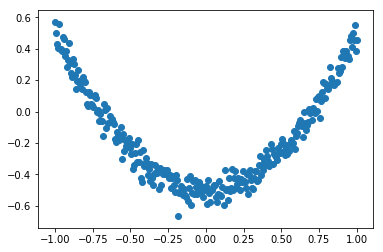

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_Plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_Plus_b
    else:
        outputs = activation_function(Wx_Plus_b)
    return outputs

x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(l1, 10, 1, activation_function=None)
#reduction_indices=[1]按行求和
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction),
                    reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

for i in range(1000):
    
    sess.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i % 200 == 0 :
        #print(sess.run(loss, feed_dict={xs:x_data, ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        
        prediction_value = sess.run(prediction, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)   
        plt.pause(0.1)